# Productivity Statistics

In [15]:
from datetime import datetime, timedelta, time
from calendar_ipynb.events import process_events_and_classify, fetch_events_parallel, get_primary_timezone
from calendar_ipynb.ipywidgets.calendar_selection import get_selection_from_cache as get_selected_calendars

calendars = get_selected_calendars()
timezone = get_primary_timezone(calendars)
yesterday = (datetime.now() - timedelta(days=1)).date()
_90days_ago = yesterday - timedelta(days=90)

from_datetime = datetime.combine(_90days_ago, time.min, tzinfo=timezone)
to_datetime = datetime.combine(yesterday, time.max, tzinfo=timezone)

# Fetch events since last 90 days
fetched_events = fetch_events_parallel(
    email_map=calendars,
    from_datetime=from_datetime,
    to_datetime=to_datetime
)

events = process_events_and_classify(
    events=fetched_events,
    from_datetime=from_datetime,
    to_datetime=to_datetime,
)

INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:calendar_ipynb.events_incremental:Sync completed for fahimalizain@gmail.com/mbn0dk4phhhufr6hpbrl15p4h0@group.calendar.google.com: Added 0, Updated 0, Deleted 0
INFO:calendar_ipynb.events_incremental:Sync completed for fahimalizain@gmail.com/j9d5885raedlop9apnj5c4odoo@group.calendar.google.com: Added 0, Updated 0, Deleted 0
INFO:calendar_ipynb.events_incremental:S

Total Events Fetched: 3911


In [16]:
from calendar_ipynb.meta import get_productive_categories

productive_categories = get_productive_categories()

work_events = [
    x for x in events
    if any([
        category[0] in productive_categories
        for category in x.get("categories", [])
    ])
]

categories = set()
for event in work_events:
    for category in event.get("categories", []):
        categories.add(category[0])

print("Found {} / {} Work Events".format(
    len(work_events),
    len(events)
), "across {} categories".format(len(categories)))

last_30_work_events = [
    x for x in work_events
    if datetime.fromisoformat(x["start"]["dateTime"]).date() >= (_90days_ago + timedelta(days=60))
]

Found 1077 / 3940 Work Events across 14 categories


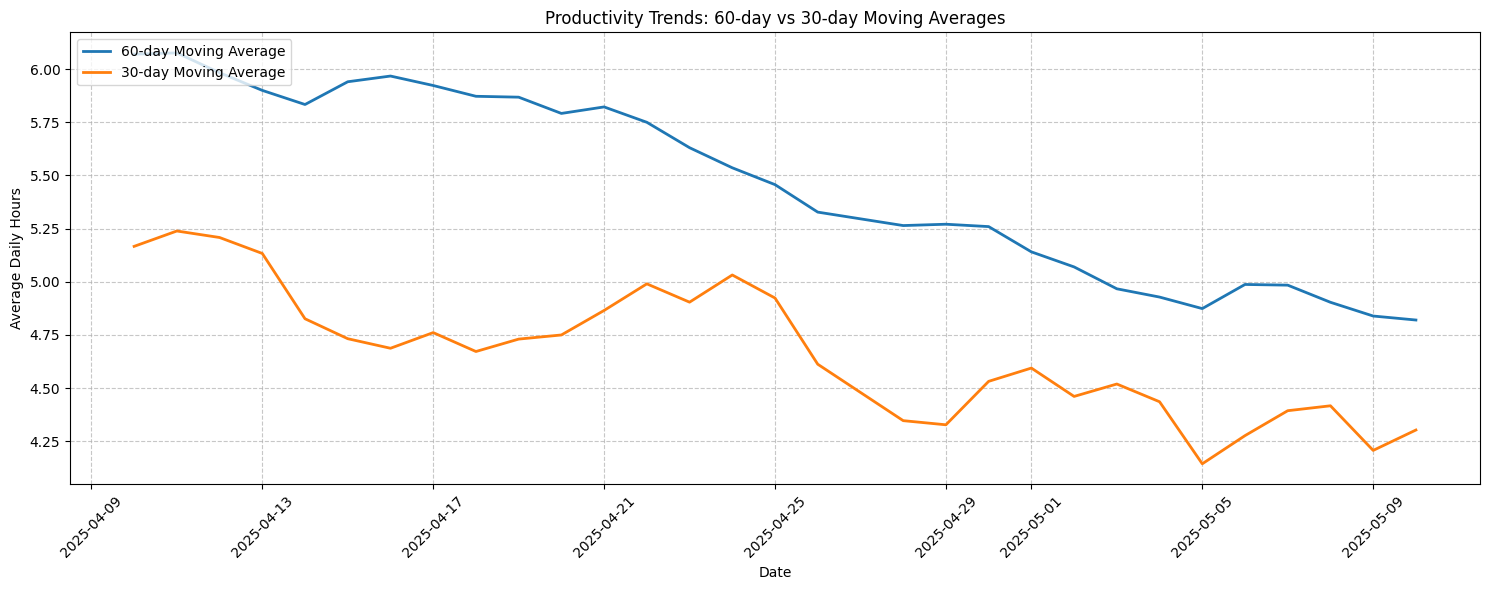

In [17]:
from calendar_ipynb.ipywidgets.productivity_ipynb.productivity_60d_v_90d_avg import show_productivity_line_60d_v_30d_avg
show_productivity_line_60d_v_30d_avg(work_events)

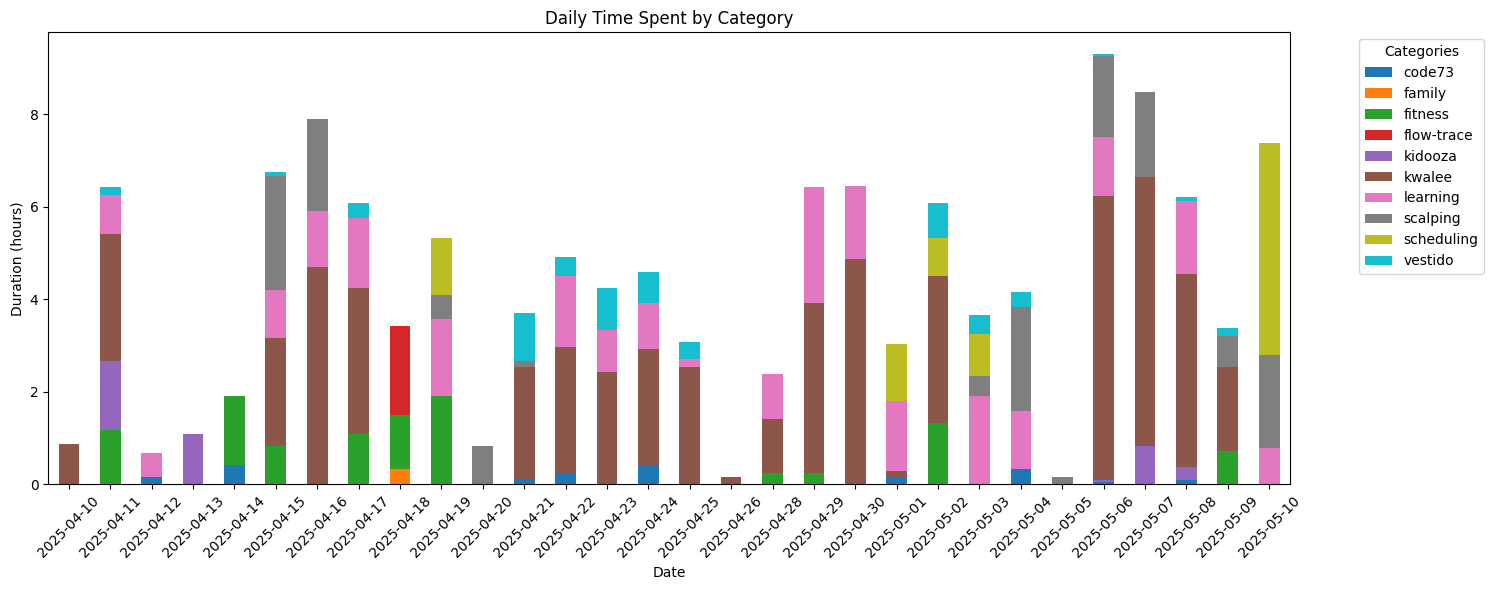

In [18]:
from calendar_ipynb.ipywidgets.productivity_ipynb.productivity_bargraph_grouped_by_day import show_productivity_bargraph_grouped_by_day
show_productivity_bargraph_grouped_by_day(last_30_work_events)

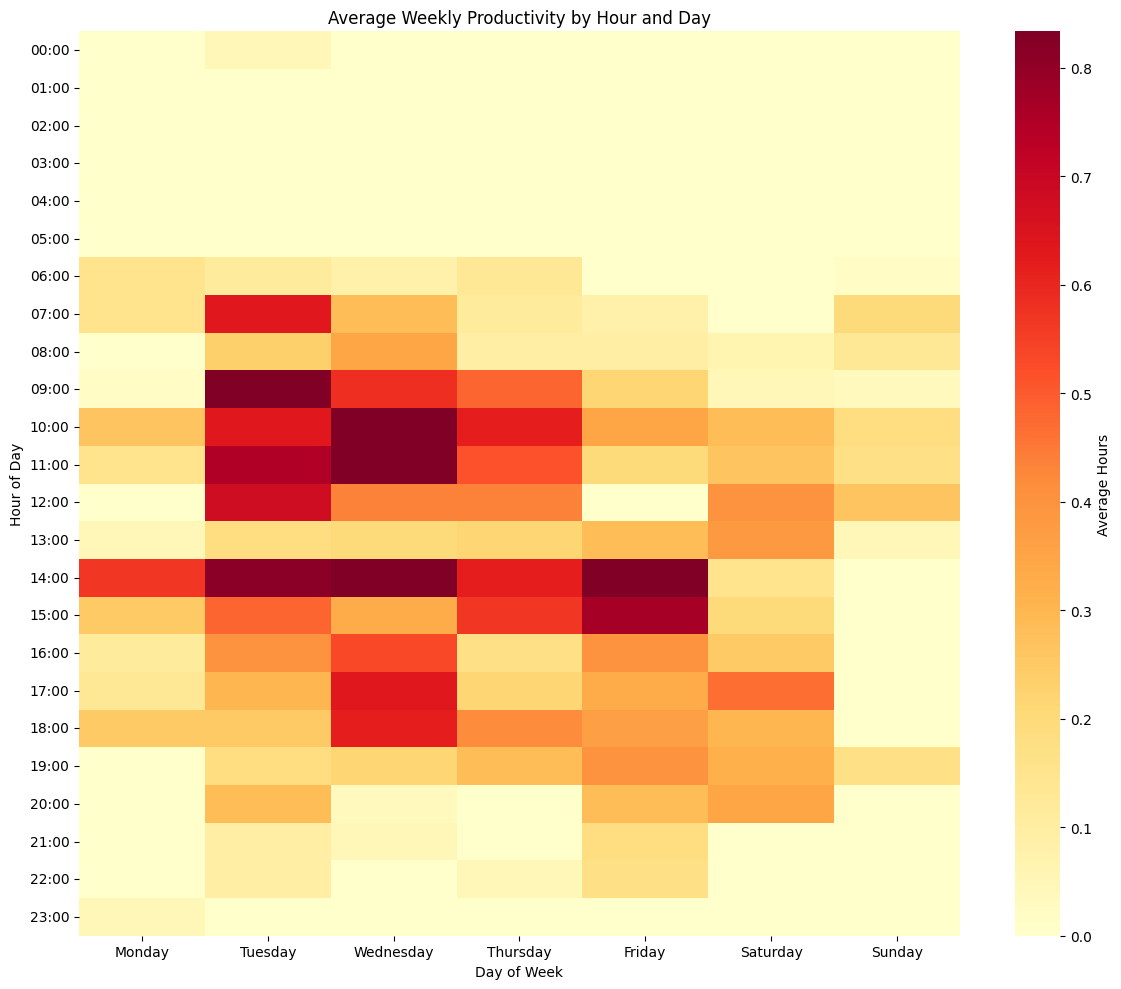

In [19]:
from calendar_ipynb.ipywidgets.productivity_ipynb.productivity_heatmap_hourly import show_productivity_weekday_heatmap
show_productivity_weekday_heatmap(last_30_work_events)

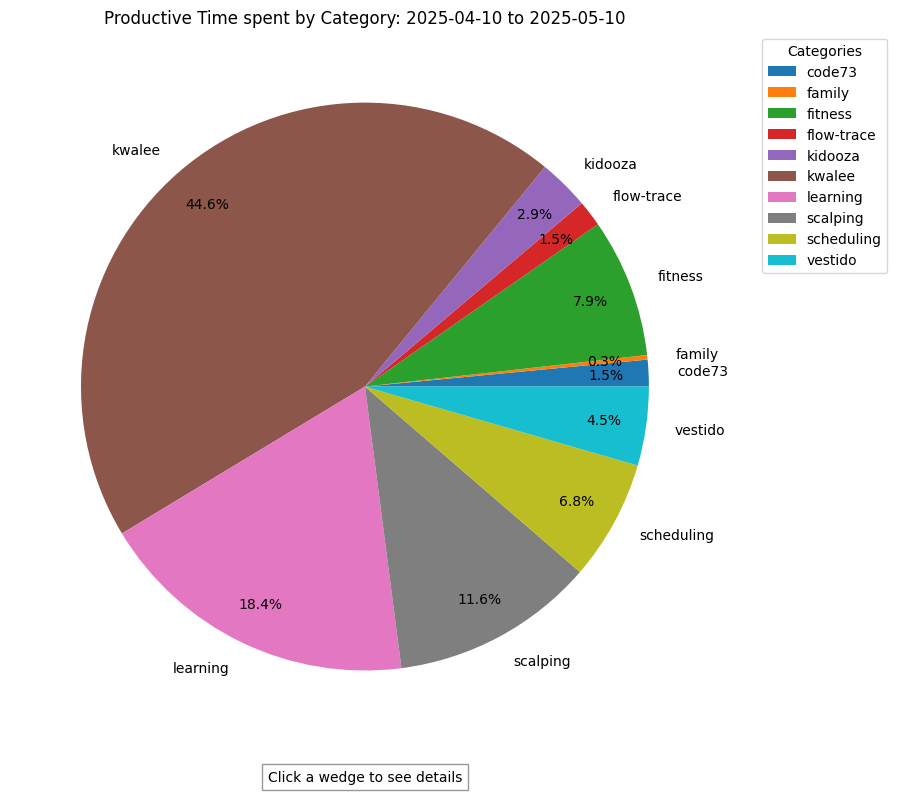

In [20]:
from calendar_ipynb.ipywidgets.productivity_ipynb.productivity_category_piechart import show_productivity_piechart
show_productivity_piechart(last_30_work_events)

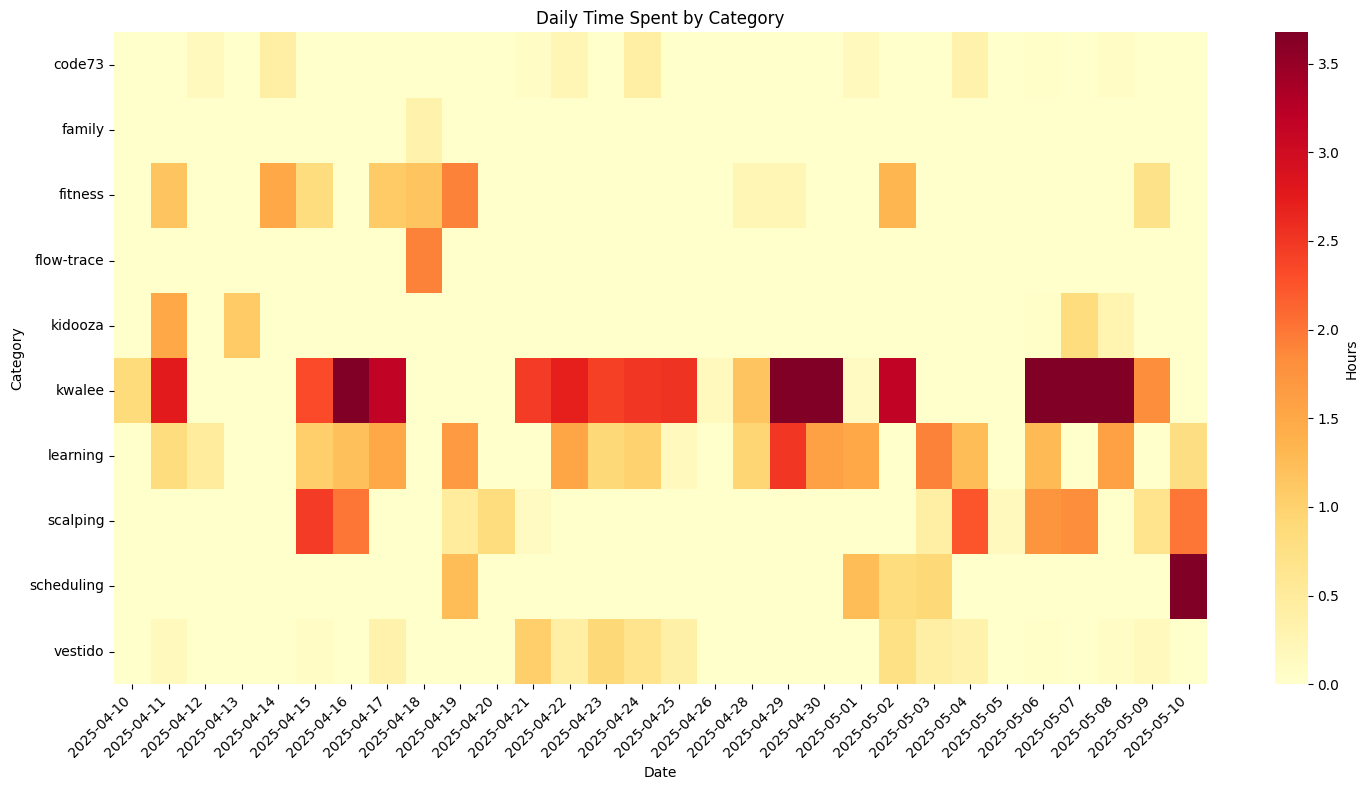

In [21]:
# Area Chart
# X-Axis: Date
# Y-Axis: Cumulative Time Spent
# Stacked areas for each category
# Good for identifying trends over time
from calendar_ipynb.ipywidgets.productivity_ipynb.productivity_project_heatmap import show_productivity_project_heatmap
show_productivity_project_heatmap(last_30_work_events)